# PRODIGY_DS_02/Nada Mohamed Abd ElRasoul


# Import important Libraries

In [1]:
# import pandas, numpy ,matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# read datasets
data= pd.read_csv('gender_submission.csv')
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')


In [3]:
# check 
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
# load
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(418, 2)

In [6]:
train.shape

(891, 12)

In [7]:
train['PassengerId'].duplicated().sum()

0

# EDA & Data pre-processing

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#to know the tatal null in percent 
print((train.isna().sum()/len(train))*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [10]:
train .describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df=train.copy()
df1=train.copy()
df2=train.copy()

check on the Age Normality in a formal way to decide if it could be filled with mean

In [12]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df['Age'])


print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("The data looks normally distributed (fail to reject the null hypothesis)")
else:
    print("The data does not look normally distributed (reject the null hypothesis)")

Shapiro-Wilk Statistic: nan
P-value: 1.0
The data looks normally distributed (fail to reject the null hypothesis)


as it is not normally distributed according to shapiro test so we can't fill with mean

In [13]:
df1['Age'].fillna(df['Age'].ffill(), inplace=True)

In [14]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


In [15]:
df2['Age'].fillna(df2['Age'].bfill(), inplace=True)

In [16]:
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.870561,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.597668,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


since the nearest mean and variance to the actual data is the one filled with backward method so, we will fill the missing cells in AGE by this method 

In [17]:
#since the null percentage in Embarked coulmn is 0.224467% it will be more wise to drop nulls
df2.dropna(subset=['Embarked'], inplace=True)

In [18]:
df2['Cabin'].fillna(df2['Cabin'].bfill(), inplace=True)

In [19]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

it seems that the missing values are at the beginning of the Cabin column where no forward values are available to fill them so let's apply forward method 

In [20]:
df2['Cabin'].fillna(df2['Cabin'].ffill(), inplace=True)

In [21]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now we have managed all null values :)

In [22]:
df2.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
#age should be integer
df2["Age"]=df2["Age"].astype(int)


<Axes: >

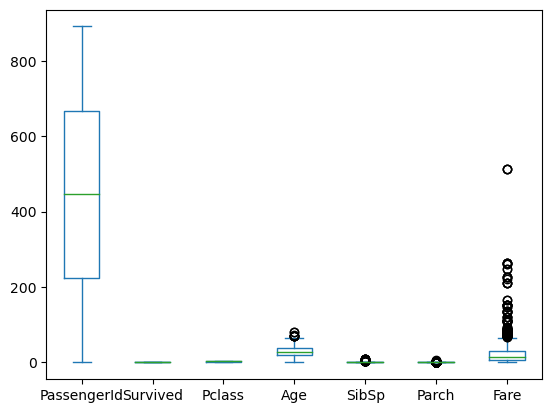

In [24]:
df2.plot(kind='box')

<Axes: >

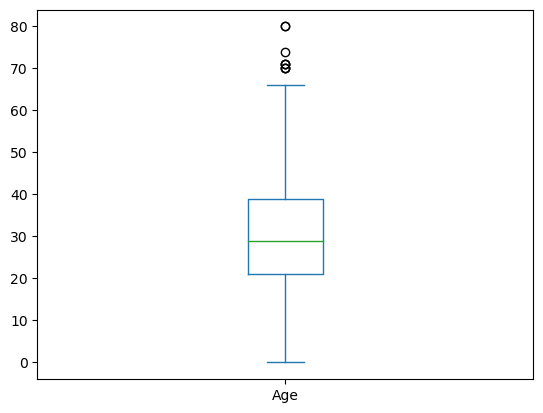

In [25]:
df2['Age'].plot(kind='box')

In [26]:
df2['Age'].max()

80

The oldest age  is logically corrcet so we can't trim it or consider it as outlier

<Axes: >

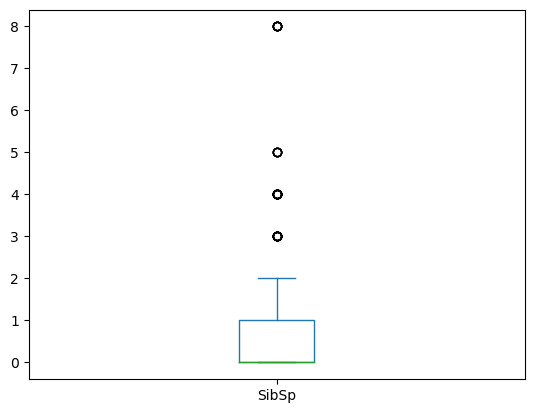

In [27]:
df2['SibSp'].plot(kind='box')

In [28]:
df2['SibSp'].max()

8

<Axes: >

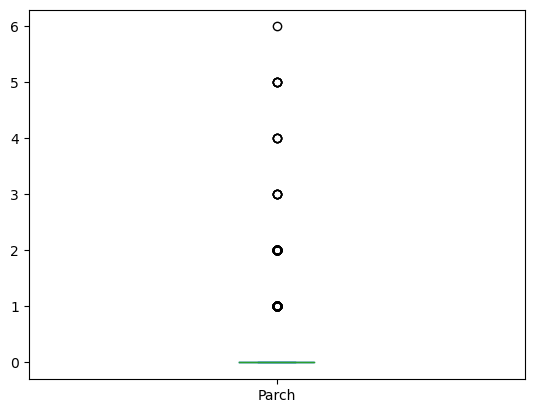

In [29]:
df2['Parch'].plot(kind='box')

In [30]:
df2['Parch'].max()

6

<Axes: >

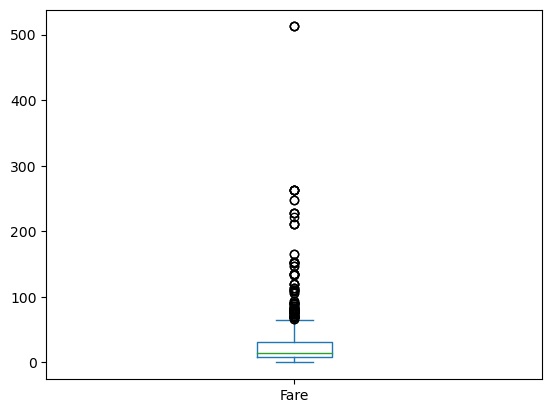

In [31]:
df2['Fare'].plot(kind='box')

In [32]:
df2['Fare'].max()

512.3292

It's the number of siblings and parents so it's fine no problem with that and according to the fare it may happen that someone paid this number so we are done with the outliers

In [33]:
print(df2['Pclass'].unique())

[3 1 2]


In [34]:
print(df2['Embarked'].unique())

['S' 'C' 'Q']


# Visulaization

<Axes: ylabel='Density'>

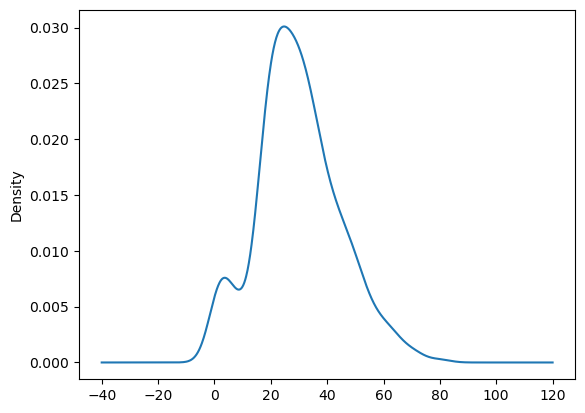

In [35]:
df2.Age.plot(kind='kde')

<Axes: xlabel='Pclass', ylabel='count'>

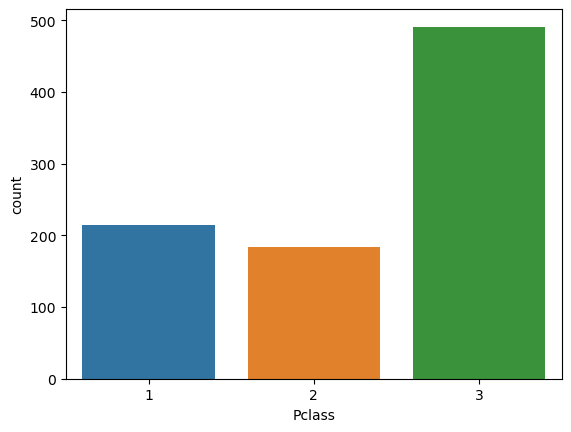

In [36]:
sns.countplot(x='Pclass',data=df2)

In [37]:
df2[['Pclass','Age']].value_counts()

Pclass  Age
3       18     24
        22     23
        24     22
        21     21
        32     19
               ..
2       46      1
        43      1
        41      1
        38      1
3       80      1
Name: count, Length: 180, dtype: int64

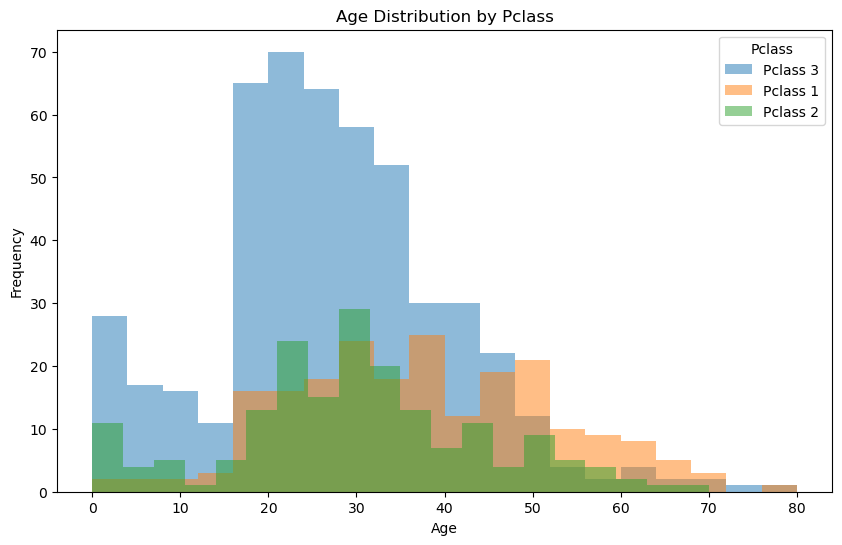

In [38]:
plt.figure(figsize=(10, 6))
for pclass in df2['Pclass'].unique():
    subset = df2[df2['Pclass'] == pclass]
    plt.hist(subset['Age'].dropna(), bins=20, alpha=0.5, label=f'Pclass {pclass}')

plt.title('Age Distribution by Pclass')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Pclass')
plt.show()


It's quite clear that specific groups have higher survival rate than other groups.

In [39]:
df2.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

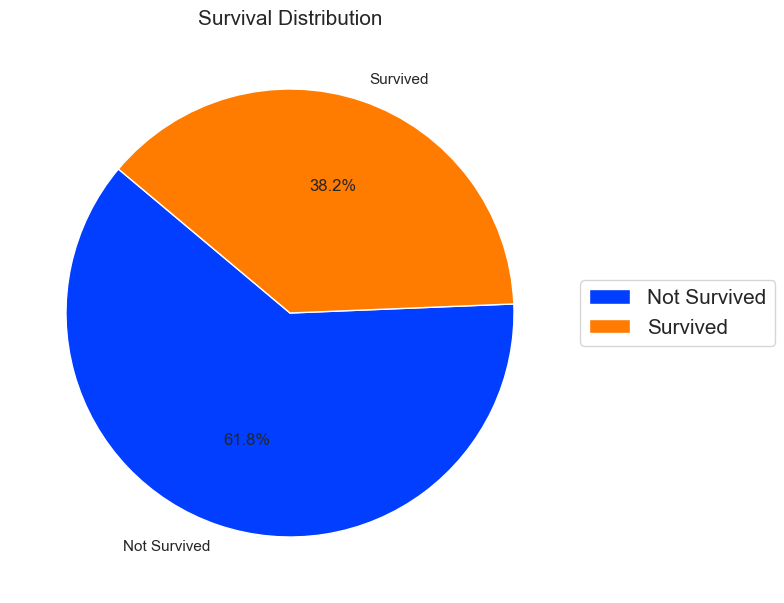

In [40]:
sns.set(style="whitegrid")
survived_counts = df2["Survived"].value_counts()

labels = ["Not Survived", "Survived"]
colors = sns.color_palette("bright")[0:2]  
fig, axs = plt.subplots(figsize=(8, 8))
plt.pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Survival Distribution', size=15)
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.subplots_adjust(left=0.1, right=0.8)
plt.show()

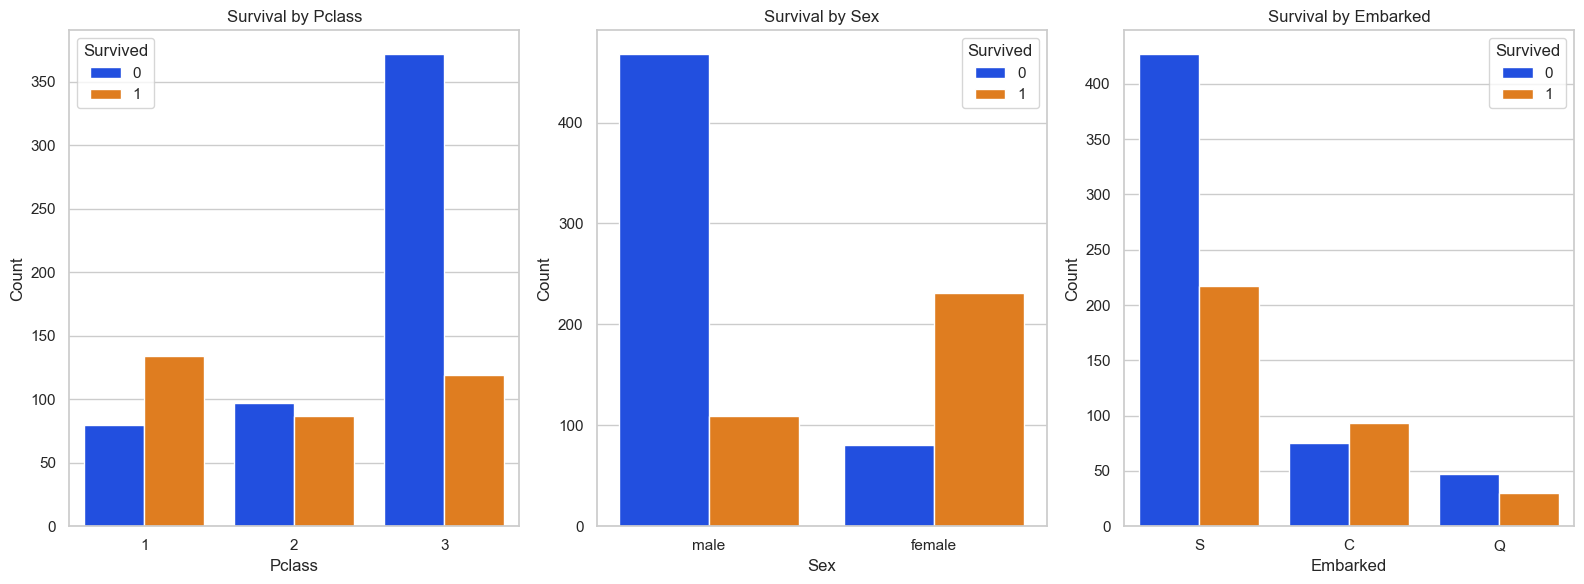

In [41]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
color_palette = "bright"

# Plot Survival by Pclass
sns.countplot(x="Pclass", hue="Survived", data=df2, ax=axs[0], palette=color_palette)
axs[0].set_title("Survival by Pclass")
axs[0].set_xlabel("Pclass", size=12)
axs[0].set_ylabel("Count", size=12)
axs[0].legend(title="Survived", loc="upper left")

# Plot Survival by Sex
sns.countplot(x="Sex", hue="Survived", data=df2, ax=axs[1], palette=color_palette)
axs[1].set_title("Survival by Sex")
axs[1].set_xlabel("Sex", size=12)
axs[1].set_ylabel("Count", size=12)
axs[1].legend(title="Survived", loc="upper right")

# Plot Survival by Embarked
sns.countplot(x="Embarked", hue="Survived", data=df2, ax=axs[2], palette=color_palette)
axs[2].set_title("Survival by Embarked")
axs[2].set_xlabel("Embarked", size=12)
axs[2].set_ylabel("Count", size=12)
axs[2].legend(title="Survived", loc="upper right")

plt.tight_layout()
plt.show()

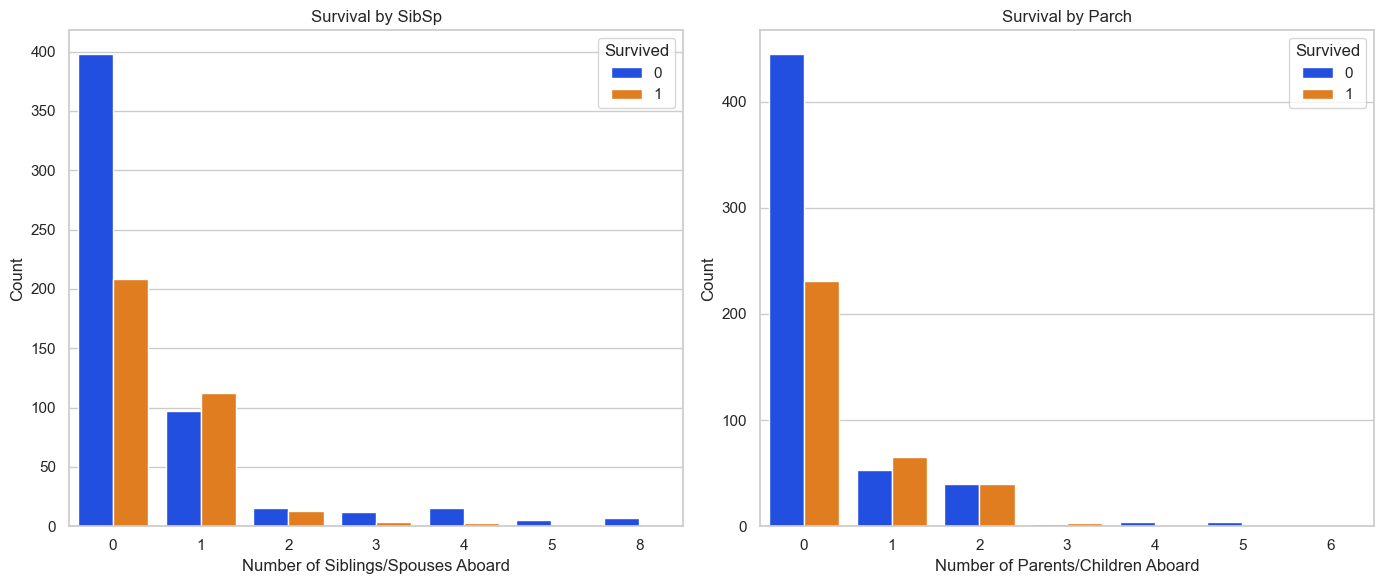

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

color_palette = "bright"

# Plot Survival by SibSp
sns.countplot(x="SibSp", hue="Survived", data=df2, ax=axs[0], palette=color_palette)
axs[0].set_title("Survival by SibSp")
axs[0].set_xlabel("Number of Siblings/Spouses Aboard", size=12)
axs[0].set_ylabel("Count", size=12)

# Plot Survival by Parch
sns.countplot(x="Parch", hue="Survived", data=df2, ax=axs[1], palette=color_palette)
axs[1].set_title("Survival by Parch")
axs[1].set_xlabel("Number of Parents/Children Aboard", size=12)
axs[1].set_ylabel("Count", size=12)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

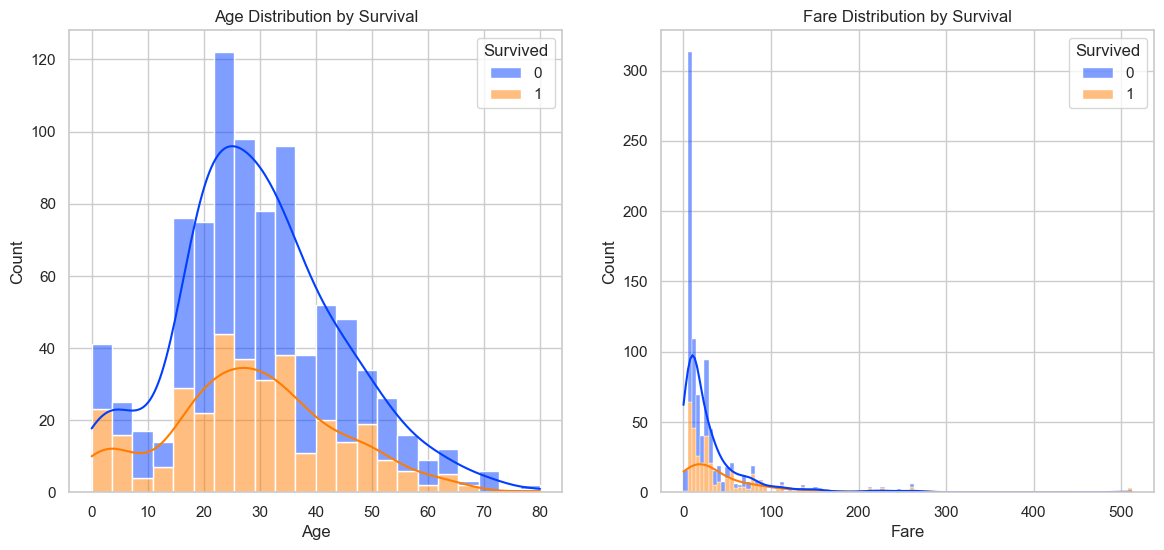

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

color_palette = "bright"

# Plot Age Distribution by Survival
sns.histplot(df2, x='Age', hue='Survived', multiple='stack', kde=True, ax=axs[0], palette=color_palette)
axs[0].set_title('Age Distribution by Survival')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

# Plot Fare Distribution by Survival
sns.histplot(df2, x='Fare', hue='Survived', multiple='stack', kde=True, ax=axs[1], palette=color_palette)
axs[1].set_title('Fare Distribution by Survival')
axs[1].set_xlabel('Fare')
axs[1].set_ylabel('Count')

# Extract Titles and encoding

In [44]:
# Import the 're' module for regular expressions
import re
def get_title(name):
    match = re.search(r',\s*(\w+)\.', name)
    return match.group(1) if match else None

df2['Titles'] = df2['Name'].apply(get_title)


In [45]:
print(df2["Titles"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' None 'Jonkheer']


In [46]:
def categorize_title(title):
    academic = {'Dr', 'Rev', 'Major', 'Col', 'Capt'}
    formal = {'Mr', 'Mrs', 'Miss', 'Ms', 'Mme', 'Mlle', 'Lady', 'Sir'}
    nobility= {'Don', 'Jonkheer', 'Master'}
    
    if title in academic:
        return 'Academic Titles'
    elif title in formal:
        return 'Formal Titles'
    elif title in nobility:
        return 'Nobility or Social Status'
    else:
        return 'Other'
df2['TitleCategory'] = df2['Titles'].apply(categorize_title)


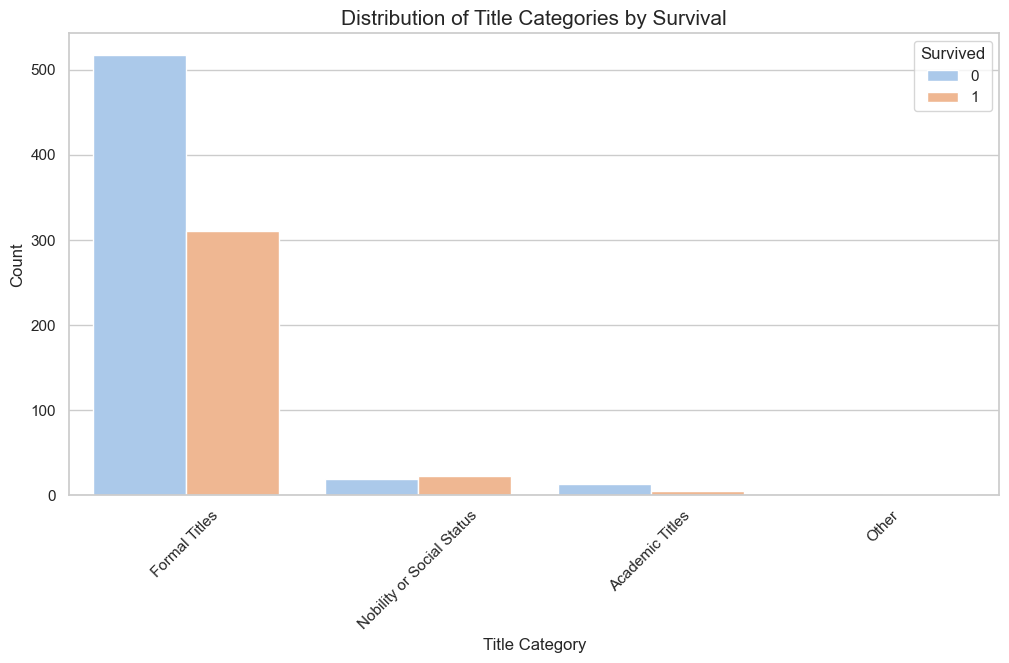

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='TitleCategory', hue='Survived', palette='pastel')
plt.xlabel('Title Category', size=12)
plt.ylabel('Count', size=12)
plt.title('Distribution of Title Categories by Survival', size=15)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Survived')
plt.show()

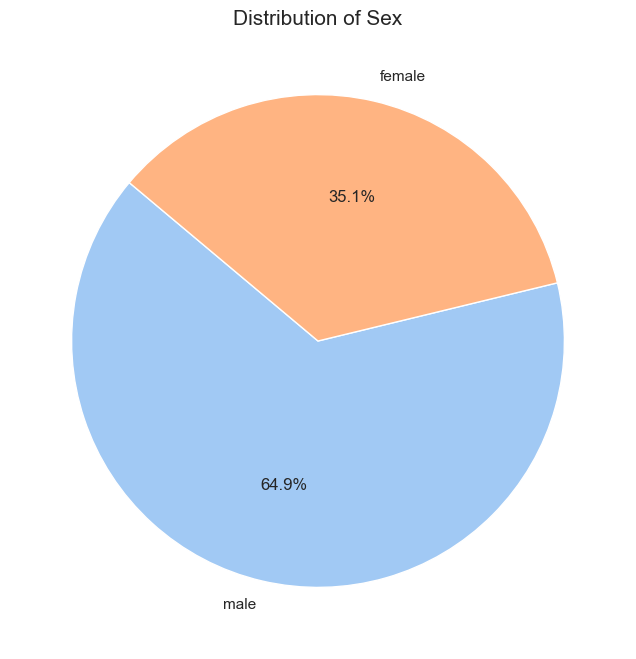

In [48]:
sex_counts = df2['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Sex', size=15)
plt.show()

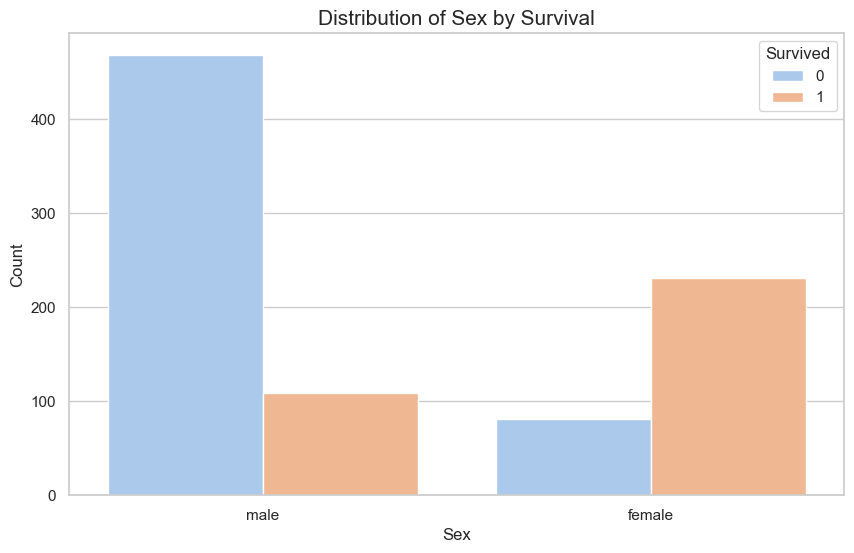

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Sex', hue='Survived', palette='pastel')
plt.xlabel('Sex', size=12)
plt.ylabel('Count', size=12)
plt.title('Distribution of Sex by Survival', size=15)
plt.legend(title='Survived')
plt.show()

In [50]:
df2['Sex'].replace({'male': 1, 'female': 0}, inplace=True)
df2['Embarked'] = df2['Embarked'].map({"C": 0, "Q": 1, "S": 2})
title_mapping = {
    'Academic Titles': 0,
    'Formal Titles': 1,
    'Nobility or Social Status': 2
}

df2['TitleCategoryEncoded'] = df2['TitleCategory'].map(title_mapping)

In [51]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,TitleCategory,TitleCategoryEncoded
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,C85,2,Mr,Formal Titles,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,Mrs,Formal Titles,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,C123,2,Miss,Formal Titles,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,Mrs,Formal Titles,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,E46,2,Mr,Formal Titles,1.0


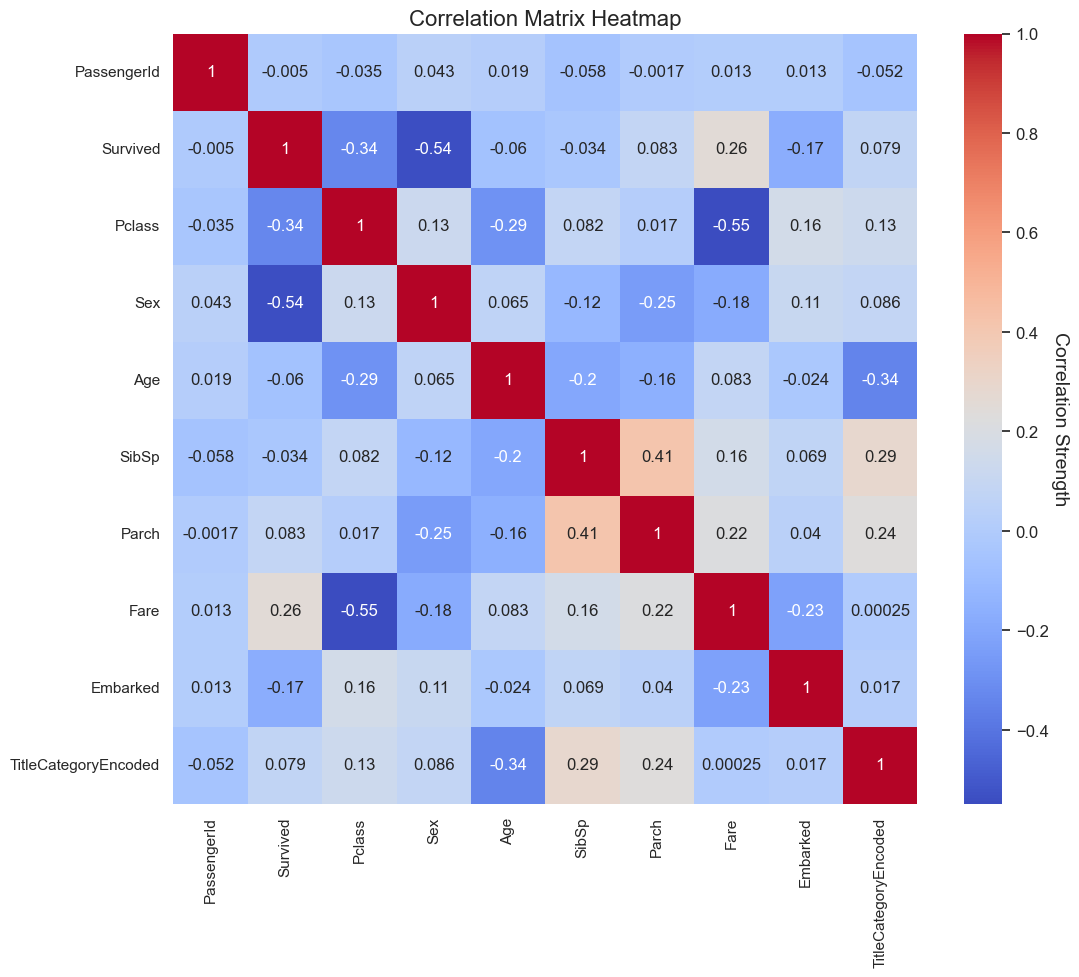

In [52]:
sns.set(style="whitegrid")
numeric_df = df2.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title("Correlation Matrix Heatmap", fontsize=16)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Strength', rotation=270, fontsize=14, labelpad=15)
plt.show()

In [53]:
# Drop the categorical columns from the DataFrame
df2 = df2.drop(columns=["PassengerId", "Name", "Ticket", "Cabin","Titles","TitleCategory"])

# Splitting the data into training and test datasets 

In [54]:
from sklearn.model_selection import train_test_split

X = df2.drop('Survived', axis=1)
y = df2.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 8)
(267, 8)
(622,)
(267,)


# Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
cols = X.columns
df_standard = pd.DataFrame(data=X_train, columns=cols)
df_standard.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TitleCategoryEncoded
0,-1.586317,-1.390670,0.335977,0.420921,-0.484112,1.124776,0.585758,-0.167531
1,0.814387,-1.390670,-0.408680,-0.488152,-0.484112,-0.468406,0.585758,-0.167531
2,0.814387,0.719078,-0.611768,-0.488152,-0.484112,-0.486566,0.585758,-0.167531
3,-0.385965,0.719078,0.403673,0.420921,1.934506,-0.097351,0.585758,-0.167531
4,-0.385965,0.719078,-0.070199,0.420921,-0.484112,-0.097924,-1.944391,-0.167531


# DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
DecisionTreeClassifierScore=tree.score(X_test,y_test)
print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  78.65168539325843
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       167
           1       0.73      0.68      0.70       100

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.79      0.78       267



In [59]:
#change the arrays into dataframes
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

In [60]:
from sklearn.impute import SimpleImputer

# Imputer to fill missing values with the median of each column
imputer = SimpleImputer(strategy='median')

# Fit the imputer on training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train_df)
X_test_imputed = imputer.transform(X_test_df)


# LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lg = LogisticRegression(max_iter=1000)

lg.fit(X_train_imputed, y_train)
pred = lg.predict(X_test_imputed)

accuracy = accuracy_score(y_test, pred) * 100
report = classification_report(y_test, pred)

print(f"Accuracy Score: {accuracy:.2f}%")
print("Classification Report:\n", report)


Accuracy Score: 81.65%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       167
           1       0.75      0.76      0.76       100

    accuracy                           0.82       267
   macro avg       0.80      0.81      0.80       267
weighted avg       0.82      0.82      0.82       267



In [62]:
y_pred = lg.predict(X_test_imputed)

In [63]:
y_pred


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
 

Accuracy: 0.8164794007490637
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       167
           1       0.75      0.76      0.76       100

    accuracy                           0.82       267
   macro avg       0.80      0.81      0.80       267
weighted avg       0.82      0.82      0.82       267

Confusion Matrix:
[[142  25]
 [ 24  76]]


In [65]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [69]:
# Convert predictions to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['Predictions'])

output_file = 'predictions.xlsx'
y_pred_df.to_excel(output_file, index=False)

print(f'Predictions saved to {output_file}')

Predictions saved to predictions.csv


In [71]:
output_file = r'C:\Users\Nada\Downloads\predictions.xlsx'

y_pred_df.to_excel(output_file, index=False)


In [73]:
y_pred_df = pd.DataFrame(y_pred, columns=['Predictions'])

# Save to CSV
output_file = r'C:\Users\Nada\Downloads\predictions.csv'  # Using raw string for the file path
y_pred_df.to_csv(output_file, index=False)

print(f'Predictions saved to {output_file}')

Predictions saved to C:\Users\Nada\Downloads\predictions.csv
